# African Literacy Rate Analysis and Prediction
## World Bank Gender Statistics - African Countries Focus

### Project Overview
This notebook provides a comprehensive analysis of literacy rates in African countries using World Bank gender statistics data. We will explore patterns across African nations, gender, and time periods, then build predictive models using linear regression, decision trees, and random forest algorithms.

### Mission Statement
The goal is to predict literacy rates in African countries based on demographic and temporal factors, compare different machine learning models, and provide insights that could inform educational policy decisions across the African continent.

### Dataset Information
- **Source**: World Bank Gender Statistics
- **Focus**: Literacy rates (%) for population aged 15-24 years in African countries
- **Scope**: African countries data with gender and temporal dimensions
- **Geographic Focus**: Sub-Saharan Africa and North African countries

In [1]:
# Import Required Libraries
print("Loading required libraries...")

# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

# Statistical analysis
from scipy import stats
from scipy.stats import pearsonr, spearmanr

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

Loading required libraries...
✅ All libraries imported successfully!
✅ All libraries imported successfully!


## 1. Load and Explore the Dataset

Let's start by loading the literacy data and examining its structure.

In [2]:
# Load the dataset
print("Loading literacy rate dataset...")
df = pd.read_csv('../../../literacy_data.csv')

print(f"✅ Dataset loaded successfully!")
print(f"📊 Dataset shape: {df.shape}")
print(f"📝 Columns: {len(df.columns)}")
print(f"🔍 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display basic information
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
df.info()

Loading literacy rate dataset...
✅ Dataset loaded successfully!
📊 Dataset shape: (101760, 35)
📝 Columns: 35
🔍 Memory usage: 178.65 MB

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101760 entries, 0 to 101759
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   STRUCTURE               101760 non-null  object 
 1   STRUCTURE_ID            101760 non-null  object 
 2   ACTION                  101760 non-null  object 
 3   FREQ                    101760 non-null  object 
 4   FREQ_LABEL              101760 non-null  object 
 5   REF_AREA                101760 non-null  object 
 6   REF_AREA_LABEL          101760 non-null  object 
 7   INDICATOR               101760 non-null  object 
 8   INDICATOR_LABEL         101760 non-null  object 
 9   SEX                     101760 non-null  object 
 10  SEX_LABEL               101760 non-null  object 
 11  AGE                     101760

In [3]:
# Examine the structure of the dataset
print("COLUMN NAMES AND FIRST FEW ROWS")
print("="*50)
print("Columns in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nFirst 5 rows:")
print("="*50)
df.head()

COLUMN NAMES AND FIRST FEW ROWS
Columns in the dataset:
 1. STRUCTURE
 2. STRUCTURE_ID
 3. ACTION
 4. FREQ
 5. FREQ_LABEL
 6. REF_AREA
 7. REF_AREA_LABEL
 8. INDICATOR
 9. INDICATOR_LABEL
10. SEX
11. SEX_LABEL
12. AGE
13. AGE_LABEL
14. URBANISATION
15. URBANISATION_LABEL
16. UNIT_MEASURE
17. UNIT_MEASURE_LABEL
18. COMP_BREAKDOWN_1
19. COMP_BREAKDOWN_1_LABEL
20. COMP_BREAKDOWN_2
21. COMP_BREAKDOWN_2_LABEL
22. COMP_BREAKDOWN_3
23. COMP_BREAKDOWN_3_LABEL
24. TIME_PERIOD
25. OBS_VALUE
26. DATABASE_ID
27. DATABASE_ID_LABEL
28. UNIT_MULT
29. UNIT_MULT_LABEL
30. UNIT_TYPE
31. UNIT_TYPE_LABEL
32. OBS_STATUS
33. OBS_STATUS_LABEL
34. OBS_CONF
35. OBS_CONF_LABEL

First 5 rows:


,STRUCTURE,STRUCTURE_ID,ACTION,FREQ,FREQ_LABEL,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,SEX,SEX_LABEL,AGE,AGE_LABEL,URBANISATION,URBANISATION_LABEL,UNIT_MEASURE,UNIT_MEASURE_LABEL,COMP_BREAKDOWN_1,COMP_BREAKDOWN_1_LABEL,COMP_BREAKDOWN_2,COMP_BREAKDOWN_2_LABEL,COMP_BREAKDOWN_3,COMP_BREAKDOWN_3_LABEL,TIME_PERIOD,OBS_VALUE,DATABASE_ID,DATABASE_ID_LABEL,UNIT_MULT,UNIT_MULT_LABEL,UNIT_TYPE,UNIT_TYPE_LABEL,OBS_STATUS,OBS_STATUS_LABEL,OBS_CONF,OBS_CONF_LABEL
0,datastructure,WB.DATA360:DS_DATA360(1.1),I,A,Annual,ABW,Aruba,WB_GS_SE_ADT,Literacy rate (%),F,Female,Y15T24,15 to 24 years old,_T,Total,PT,Percentage,_Z,Not Applicable,_Z,Not Applicable,_Z,Not Applicable,1960,NaN,WB_GS,Gender Statistics,0,Units,RATIO,Ratio,O,Missing value,PU,Public
1,datastructure,WB.DATA360:DS_DATA360(1.1),I,A,Annual,AFE,Africa Eastern and Southern,WB_GS_SE_ADT,Literacy rate (%),F,Female,Y15T24,15 to 24 years old,_T,Total,PT,Percentage,_Z,Not Applicable,_Z,Not Applicable,_Z,Not Applicable,1960,NaN,WB_GS,Gender Statistics,0,Units,RATIO,Ratio,O,Missing value,PU,Public
2,datastructure,WB.DATA360:DS_DATA360(1.1),I,A,Annual,AFG,Afghanistan,WB_GS_SE_ADT,Literacy rate (%),F,Female,Y15T24,15 to 24 years old,_T,Total,PT,Percentage,_Z,Not Applicable,_Z,Not Applicable,_Z,Not Applicable,1960,NaN,WB_GS,Gender Statistics,0,Units,RATIO,Ratio,O,Missing value,PU,Public
3,datastructure,WB.DATA360:DS_DATA360(1.1),I,A,Annual,AFW,Africa Western and Central,WB_GS_SE_ADT,Literacy rate (%),F,Female,Y15T24,15 to 24 years old,_T,Total,PT,Percentage,_Z,Not Applicable,_Z,Not Applicable,_Z,Not Applicable,1960,NaN,WB_GS,Gender Statistics,0,Units,RATIO,Ratio,O,Missing value,PU,Public
4,datastructure,WB.DATA360:DS_DATA360(1.1),I,A,Annual,AGO,Angola,WB_GS_SE_ADT,Literacy rate (%),F,Female,Y15T24,15 to 24 years old,_T,Total,PT,Percentage,_Z,Not Applicable,_Z,Not Applicable,_Z,Not Applicable,1960,NaN,WB_GS,Gender Statistics,0,Units,RATIO,Ratio,O,Missing value,PU,Public


In [4]:
# Examine key columns for our analysis
print("KEY COLUMNS FOR ANALYSIS")
print("="*50)

key_columns = ['REF_AREA_LABEL', 'SEX_LABEL', 'AGE_LABEL', 
               'TIME_PERIOD', 'OBS_VALUE', 'OBS_STATUS_LABEL']

for col in key_columns:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        if df[col].nunique() < 20:
            print(f"  Values: {df[col].unique()}")
        else:
            print(f"  Sample values: {list(df[col].unique()[:10])}")

# Check the target variable (OBS_VALUE - literacy rates)
print(f"\n📈 TARGET VARIABLE (OBS_VALUE) STATISTICS:")
print("="*50)
print(df['OBS_VALUE'].describe())

KEY COLUMNS FOR ANALYSIS

REF_AREA_LABEL:
  Unique values: 265
  Sample values: ['Aruba', 'Africa Eastern and Southern', 'Afghanistan', 'Africa Western and Central', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina']

SEX_LABEL:
  Unique values: 3
  Values: ['Female' 'Male' 'Total']

AGE_LABEL:
  Unique values: 2
  Values: ['15 to 24 years old' '15 years old and over']

TIME_PERIOD:
  Unique values: 64
  Sample values: [np.int64(1960), np.int64(1961), np.int64(1962), np.int64(1963), np.int64(1964), np.int64(1965), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1969)]

OBS_VALUE:
  Unique values: 15627
  Sample values: [np.float64(nan), np.float64(99.8000030517578), np.float64(99.0774230957031), np.float64(97.9975967407227), np.float64(99.7203903198242), np.float64(98.8453598022461), np.float64(97.9247894287109), np.float64(99.7551879882812), np.float64(98.9623565673828), np.float64(97.9629211425781)]

OBS_STATUS_LABEL:
  Unique values: 2
  Valu

## 2. Data Cleaning and Preprocessing

Now let's clean the data and prepare it for analysis and modeling.

In [5]:
# Check for missing values and data quality issues
print("DATA QUALITY ASSESSMENT")
print("="*50)

# Check missing values in key columns
missing_info = df.isnull().sum()
print("Missing values per column:")
print(missing_info[missing_info > 0].sort_values(ascending=False))

# Check the OBS_VALUE column specifically (our target)
print(f"\nOBS_VALUE (Literacy Rate) Analysis:")
print(f"Total records: {len(df)}")
print(f"Missing values: {df['OBS_VALUE'].isnull().sum()}")
print(f"Non-null values: {df['OBS_VALUE'].notna().sum()}")
print(f"Percentage with data: {(df['OBS_VALUE'].notna().sum() / len(df)) * 100:.2f}%")

# Check for invalid values (literacy rates should be 0-100)
valid_literacy = df['OBS_VALUE'].between(0, 100, inclusive='both')
print(f"Valid literacy rates (0-100): {valid_literacy.sum()}")
print(f"Invalid literacy rates: {(~valid_literacy & df['OBS_VALUE'].notna()).sum()}")

DATA QUALITY ASSESSMENT
Missing values per column:
OBS_VALUE    84799
dtype: int64

OBS_VALUE (Literacy Rate) Analysis:
Total records: 101760
Missing values: 84799
Non-null values: 16961
Percentage with data: 16.67%
Valid literacy rates (0-100): 16961
Invalid literacy rates: 0


In [6]:
# Create a clean dataset for analysis - Focus on African Countries Only
print("CREATING CLEAN DATASET - AFRICAN COUNTRIES FOCUS")
print("="*60)

# Filter for records with valid literacy rates
df_clean = df[df['OBS_VALUE'].notna() & 
              df['OBS_VALUE'].between(0, 100, inclusive='both')].copy()

print(f"Records after removing missing/invalid literacy rates: {len(df_clean)}")

# Define African country codes (comprehensive list)
african_countries = [
    'DZA', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CMR', 'CPV', 'CAF', 'TCD', 
    'COM', 'COG', 'COD', 'CIV', 'DJI', 'EGY', 'GNQ', 'ERI', 'ETH', 'GAB', 
    'GMB', 'GHA', 'GIN', 'GNB', 'KEN', 'LSO', 'LBR', 'LBY', 'MDG', 'MWI', 
    'MLI', 'MRT', 'MUS', 'MAR', 'MOZ', 'NAM', 'NER', 'NGA', 'RWA', 'STP', 
    'SEN', 'SYC', 'SLE', 'SOM', 'ZAF', 'SSD', 'SDN', 'SWZ', 'TZA', 'TGO', 
    'TUN', 'UGA', 'ZMB', 'ZWE'
]

# Filter for African countries only
df_africa = df_clean[df_clean['REF_AREA'].isin(african_countries)].copy()

print(f"Records after filtering for African countries: {len(df_africa)}")
print(f"Number of unique African countries: {df_africa['REF_AREA_LABEL'].nunique()}")

# Display the African countries included in our dataset
african_countries_in_data = df_africa.groupby(['REF_AREA', 'REF_AREA_LABEL']).size().reset_index(name='record_count')
african_countries_in_data = african_countries_in_data.sort_values('REF_AREA_LABEL')

print(f"\nAFRICAN COUNTRIES IN DATASET:")
print("="*60)
for _, row in african_countries_in_data.iterrows():
    print(f"{row['REF_AREA']:3} - {row['REF_AREA_LABEL']:<35} - {row['record_count']:>4} records")

# Focus on recent data (let's see what time periods we have)
print(f"\nTIME PERIODS AVAILABLE FOR AFRICAN COUNTRIES:")
print("="*60)
time_periods = df_africa['TIME_PERIOD'].value_counts().sort_index()
print(f"Years covered: {time_periods.index.min()} to {time_periods.index.max()}")
print(f"Most recent years:")
print(time_periods.tail(10))

# Create the final clean dataset with African countries only
df_final = df_africa.copy()
print(f"\nFINAL AFRICAN DATASET:")
print("="*30)
print(f"Shape: {df_final.shape}")
print(f"African countries: {df_final['REF_AREA_LABEL'].nunique()}")
print(f"Time periods: {df_final['TIME_PERIOD'].nunique()}")
print(f"Gender categories: {df_final['SEX_LABEL'].unique()}")
print(f"Total records: {len(df_final):,}")

CREATING CLEAN DATASET - AFRICAN COUNTRIES FOCUS
Records after removing missing/invalid literacy rates: 16961
Records after filtering for African countries: 1830
Number of unique African countries: 54

AFRICAN COUNTRIES IN DATASET:
DZA - Algeria                             -   33 records
AGO - Angola                              -   18 records
BEN - Benin                               -   39 records
BWA - Botswana                            -   18 records
BFA - Burkina Faso                        -   69 records
BDI - Burundi                             -   46 records
CPV - Cabo Verde                          -   30 records
CMR - Cameroon                            -   44 records
CAF - Central African Republic            -   40 records
TCD - Chad                                -   40 records
COM - Comoros                             -   24 records
COD - Congo, Dem. Rep.                    -   34 records
COG - Congo, Rep.                         -   24 records
CIV - Cote d'Ivoire        

## 3. Exploratory Data Analysis - African Countries

Let's explore the literacy patterns and distributions across African nations.

In [7]:
# Statistical summary of literacy rates in African countries
print("AFRICAN LITERACY RATE STATISTICAL SUMMARY")
print("="*50)
print(df_final['OBS_VALUE'].describe())

# Distribution by gender in African countries
print(f"\nGENDER DISTRIBUTION IN AFRICAN COUNTRIES")
print("="*50)
gender_stats = df_final.groupby('SEX_LABEL')['OBS_VALUE'].agg(['count', 'mean', 'std', 'min', 'max'])
print(gender_stats)

# Top and bottom performing African countries (average literacy rate)
print(f"\nTOP 10 AFRICAN COUNTRIES BY AVERAGE LITERACY RATE")
print("="*50)
country_avg = df_final.groupby('REF_AREA_LABEL')['OBS_VALUE'].mean().sort_values(ascending=False)
print(country_avg.head(10))

print(f"\nBOTTOM 10 AFRICAN COUNTRIES BY AVERAGE LITERACY RATE")
print("="*50)
print(country_avg.tail(10))

# Data availability by time period for African countries
print(f"\nDATA AVAILABILITY BY TIME PERIOD (AFRICAN COUNTRIES)")
print("="*50)
time_counts = df_final['TIME_PERIOD'].value_counts().sort_index()
print(time_counts.tail(10))  # Most recent years

AFRICAN LITERACY RATE STATISTICAL SUMMARY
count    1830.000000
mean       66.140024
std        23.463460
min         3.390590
25%        49.033038
50%        71.060146
75%        85.700798
max       100.000000
Name: OBS_VALUE, dtype: float64

GENDER DISTRIBUTION IN AFRICAN COUNTRIES
           count       mean        std      min         max
SEX_LABEL                                                  
Female       628  60.182109  26.128123  3.39059  100.000000
Male         600  72.417995  19.460225  7.19844   99.419998
Total        602  66.098143  22.568245  5.40465   99.300003

TOP 10 AFRICAN COUNTRIES BY AVERAGE LITERACY RATE
REF_AREA_LABEL
Seychelles           94.761697
Equatorial Guinea    94.360334
South Africa         93.351805
Mauritius            91.587529
Cabo Verde           88.235244
Namibia              88.231257
Zimbabwe             87.891239
Botswana             86.138223
Gabon                85.447417
Tunisia              85.333632
Name: OBS_VALUE, dtype: float64

BOTTOM 

## 4. Gender-Based Literacy Analysis - African Context

Let's analyze the differences in literacy rates between male and female populations across African countries.

In [8]:
# Calculate gender gaps in literacy rates across African countries
print("AFRICAN GENDER GAP ANALYSIS")
print("="*50)

# Pivot to compare male vs female literacy rates in African countries
gender_pivot = df_final.pivot_table(
    values='OBS_VALUE', 
    index=['REF_AREA_LABEL', 'TIME_PERIOD'], 
    columns='SEX_LABEL', 
    aggfunc='mean'
).reset_index()

# Calculate gender gap (Male - Female)
gender_pivot['Gender_Gap'] = gender_pivot['Male'] - gender_pivot['Female']

# Remove rows with missing data for either gender
gender_complete = gender_pivot.dropna(subset=['Male', 'Female'])

print(f"African countries with complete gender data: {len(gender_complete)}")
print(f"Average Male Literacy Rate (Africa): {gender_complete['Male'].mean():.2f}%")
print(f"Average Female Literacy Rate (Africa): {gender_complete['Female'].mean():.2f}%")
print(f"Average Gender Gap in Africa (M-F): {gender_complete['Gender_Gap'].mean():.2f}%")

print(f"\nAFRICAN COUNTRIES WITH LARGEST GENDER GAPS (favoring males):")
print("="*60)
largest_gaps = gender_complete.nlargest(10, 'Gender_Gap')[['REF_AREA_LABEL', 'Male', 'Female', 'Gender_Gap']]
print(largest_gaps)

print(f"\nAFRICAN COUNTRIES WITH SMALLEST/NEGATIVE GENDER GAPS (favoring females):")
print("="*60)
smallest_gaps = gender_complete.nsmallest(10, 'Gender_Gap')[['REF_AREA_LABEL', 'Male', 'Female', 'Gender_Gap']]
print(smallest_gaps)

AFRICAN GENDER GAP ANALYSIS
African countries with complete gender data: 322
Average Male Literacy Rate (Africa): 72.56%
Average Female Literacy Rate (Africa): 60.39%
Average Gender Gap in Africa (M-F): 12.17%

AFRICAN COUNTRIES WITH LARGEST GENDER GAPS (favoring males):
SEX_LABEL            REF_AREA_LABEL       Male     Female  Gender_Gap
142                          Guinea  64.190002  24.120001   40.070002
215                      Mozambique  53.866257  18.605960   35.260296
144                          Guinea  71.690002  37.239998   34.450005
148                   Guinea-Bissau  46.521660  13.195865   33.325795
279                    Sierra Leone  73.580002  41.299999   32.280003
64                             Chad  48.256630  18.015910   30.240720
162                         Liberia  62.112915  32.102611   30.010304
149                   Guinea-Bissau  66.207495  36.698929   29.508566
11                            Benin  61.080002  31.850000   29.230001
55         Central African R

## 5. Data Visualization - African Literacy Patterns

Let's create comprehensive visualizations to understand the literacy patterns across African countries.

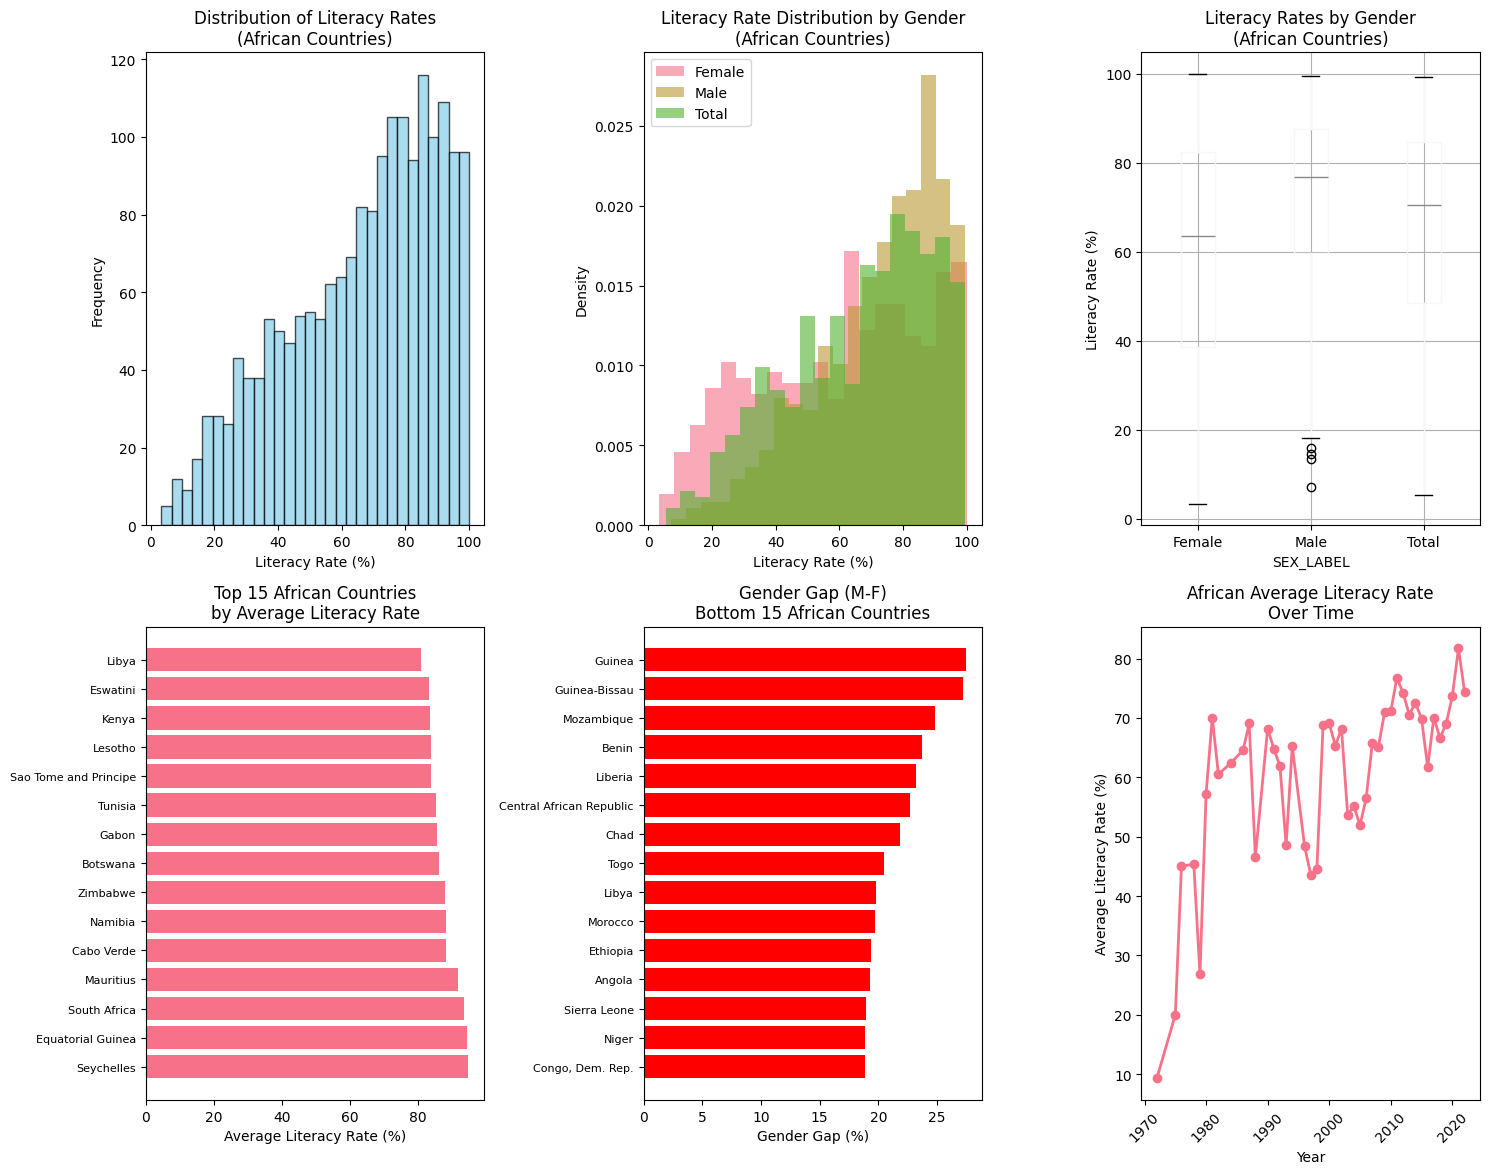

In [9]:
# Create comprehensive visualizations for African literacy data
plt.figure(figsize=(15, 12))

# 1. Distribution of literacy rates in African countries
plt.subplot(2, 3, 1)
plt.hist(df_final['OBS_VALUE'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Literacy Rates\n(African Countries)')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Frequency')

# 2. Literacy rates by gender in African countries
plt.subplot(2, 3, 2)
for gender in df_final['SEX_LABEL'].unique():
    data = df_final[df_final['SEX_LABEL'] == gender]['OBS_VALUE']
    plt.hist(data, bins=20, alpha=0.6, label=gender, density=True)
plt.title('Literacy Rate Distribution by Gender\n(African Countries)')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Density')
plt.legend()

# 3. Box plot of literacy rates by gender in Africa
plt.subplot(2, 3, 3)
df_final.boxplot(column='OBS_VALUE', by='SEX_LABEL', ax=plt.gca())
plt.title('Literacy Rates by Gender\n(African Countries)')
plt.ylabel('Literacy Rate (%)')
plt.suptitle('')  # Remove default title

# 4. Average literacy rates by top African countries
plt.subplot(2, 3, 4)
top_countries = df_final.groupby('REF_AREA_LABEL')['OBS_VALUE'].mean().nlargest(15)
plt.barh(range(len(top_countries)), top_countries.values)
plt.yticks(range(len(top_countries)), top_countries.index, fontsize=8)
plt.title('Top 15 African Countries\nby Average Literacy Rate')
plt.xlabel('Average Literacy Rate (%)')

# 5. Gender gap visualization for African countries
plt.subplot(2, 3, 5)
gender_gaps = gender_complete.groupby('REF_AREA_LABEL')['Gender_Gap'].mean().sort_values()
colors = ['red' if x > 0 else 'blue' for x in gender_gaps.tail(15).values]
plt.barh(range(len(gender_gaps.tail(15))), gender_gaps.tail(15).values, color=colors)
plt.yticks(range(len(gender_gaps.tail(15))), gender_gaps.tail(15).index, fontsize=8)
plt.title('Gender Gap (M-F)\nBottom 15 African Countries')
plt.xlabel('Gender Gap (%)')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)

# 6. Time series - average literacy by year for African countries
plt.subplot(2, 3, 6)
yearly_avg = df_final.groupby('TIME_PERIOD')['OBS_VALUE'].mean()
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2)
plt.title('African Average Literacy Rate\nOver Time')
plt.xlabel('Year')
plt.ylabel('Average Literacy Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 6. Feature Engineering and Model Preparation

Now let's prepare our features for machine learning models.

In [11]:
print("FEATURE ENGINEERING")
print("="*50)

from sklearn.preprocessing import LabelEncoder

# Create African sub-region mapping for the 54 African countries
african_subregions = {
    # North Africa (6 countries)
    'DZA': 'North Africa', 'EGY': 'North Africa', 'LBY': 'North Africa', 
    'MAR': 'North Africa', 'SDN': 'North Africa', 'TUN': 'North Africa',
    
    # West Africa (16 countries)
    'BEN': 'West Africa', 'BFA': 'West Africa', 'CPV': 'West Africa', 'CIV': 'West Africa', 
    'GMB': 'West Africa', 'GHA': 'West Africa', 'GIN': 'West Africa', 'GNB': 'West Africa', 
    'LBR': 'West Africa', 'MLI': 'West Africa', 'MRT': 'West Africa', 'NER': 'West Africa', 
    'NGA': 'West Africa', 'SEN': 'West Africa', 'SLE': 'West Africa', 'TGO': 'West Africa',
    
    # Central Africa (9 countries)
    'AGO': 'Central Africa', 'CMR': 'Central Africa', 'CAF': 'Central Africa', 'TCD': 'Central Africa', 
    'COG': 'Central Africa', 'COD': 'Central Africa', 'GNQ': 'Central Africa', 'GAB': 'Central Africa', 
    'STP': 'Central Africa',
    
    # East Africa (18 countries)
    'BDI': 'East Africa', 'COM': 'East Africa', 'DJI': 'East Africa', 'ERI': 'East Africa', 
    'ETH': 'East Africa', 'KEN': 'East Africa', 'MDG': 'East Africa', 'MWI': 'East Africa', 
    'MUS': 'East Africa', 'MOZ': 'East Africa', 'RWA': 'East Africa', 'SYC': 'East Africa', 
    'SOM': 'East Africa', 'SSD': 'East Africa', 'TZA': 'East Africa', 'UGA': 'East Africa', 
    'ZMB': 'East Africa', 'ZWE': 'East Africa',
    
    # Southern Africa (5 countries)  
    'BWA': 'Southern Africa', 'LSO': 'Southern Africa', 'NAM': 'Southern Africa', 
    'ZAF': 'Southern Africa', 'SWZ': 'Southern Africa'
}

# Apply African sub-region mapping
ml_data['African_Subregion'] = ml_data['REF_AREA'].map(african_subregions)

print(f"Features created for African analysis:")
print(f"- African countries: {ml_data['REF_AREA'].nunique()}")
print(f"- African sub-regions: {ml_data['African_Subregion'].nunique()} - {ml_data['African_Subregion'].unique()}")
print(f"- Gender categories: {ml_data['SEX_LABEL'].nunique()}")
print(f"- Time periods: {ml_data['TIME_PERIOD'].nunique()}")

print(f"\nAfrican sub-regional distribution:")
print(ml_data['African_Subregion'].value_counts())

# Initialize label encoders dictionary
label_encoders = {}

# Encode categorical variables
categorical_columns = ['REF_AREA', 'SEX_LABEL', 'African_Subregion']

for col in categorical_columns:
    le = LabelEncoder()
    ml_data[f'{col}_Encoded'] = le.fit_transform(ml_data[col])
    label_encoders[col] = le
    print(f"✅ Encoded {col}: {ml_data[col].nunique()} unique values")

# Create time-based features
ml_data['Year_Normalized'] = (ml_data['TIME_PERIOD'] - ml_data['TIME_PERIOD'].min()) / (ml_data['TIME_PERIOD'].max() - ml_data['TIME_PERIOD'].min())

# Create interaction features for better prediction
ml_data['Gender_Year_Interaction'] = ml_data['SEX_LABEL_Encoded'] * ml_data['Year_Normalized']
ml_data['Subregion_Year_Interaction'] = ml_data['African_Subregion_Encoded'] * ml_data['Year_Normalized']

print(f"\nFeature Engineering Complete!")
print(f"✅ Created {len(categorical_columns)} encoded categorical features")
print(f"✅ Created 1 normalized temporal feature")
print(f"✅ Created 2 interaction features")
print(f"✅ Total features ready for modeling: {len(categorical_columns) + 3}")

# Display final feature summary
print(f"\nFINAL FEATURE SET:")
print("="*30)
feature_summary = ml_data[['REF_AREA_Encoded', 'SEX_LABEL_Encoded', 'African_Subregion_Encoded', 
                          'TIME_PERIOD', 'Year_Normalized', 'Gender_Year_Interaction', 
                          'Subregion_Year_Interaction', 'OBS_VALUE']].describe()
print(feature_summary.round(2))

print(f"\n🎯 Ready for machine learning model training!")

FEATURE ENGINEERING
Features created for African analysis:
- African countries: 54
- African sub-regions: 5 - ['East Africa' 'West Africa' 'Central Africa' 'North Africa'
 'Southern Africa']
- Gender categories: 3
- Time periods: 44

African sub-regional distribution:
African_Subregion
West Africa        578
East Africa        564
Central Africa     270
North Africa       234
Southern Africa    184
Name: count, dtype: int64
✅ Encoded REF_AREA: 54 unique values
✅ Encoded SEX_LABEL: 3 unique values
✅ Encoded African_Subregion: 5 unique values

Feature Engineering Complete!
✅ Created 3 encoded categorical features
✅ Created 1 normalized temporal feature
✅ Created 2 interaction features
✅ Total features ready for modeling: 6

FINAL FEATURE SET:
       REF_AREA_Encoded  SEX_LABEL_Encoded  African_Subregion_Encoded  \
count           1830.00            1830.00                    1830.00   
mean              27.53               0.99                       2.13   
std               16.30       

In [12]:
# Create additional features for African analysis
print("\nCreating additional features for African countries...")

# Time-based features
ml_data['Year_Normalized'] = (ml_data['TIME_PERIOD'] - ml_data['TIME_PERIOD'].min()) / (ml_data['TIME_PERIOD'].max() - ml_data['TIME_PERIOD'].min())

# Create interaction features
ml_data['Gender_Year_Interaction'] = ml_data['Gender_Encoded'] * ml_data['Year_Normalized']
ml_data['Subregion_Year_Interaction'] = ml_data['Subregion_Encoded'] * ml_data['Year_Normalized']

# Define feature columns and target for African analysis
feature_columns = [
    'Country_Encoded', 
    'Gender_Encoded', 
    'Subregion_Encoded',
    'TIME_PERIOD',
    'Year_Normalized',
    'Gender_Year_Interaction',
    'Subregion_Year_Interaction'
]

target_column = 'OBS_VALUE'

# Prepare final dataset
X = ml_data[feature_columns].copy()
y = ml_data[target_column].copy()

print(f"\nFinal dataset shape:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Feature columns: {feature_columns}")

# Check for any missing values
print(f"\nMissing values check:")
print(f"Features: {X.isnull().sum().sum()}")
print(f"Target: {y.isnull().sum()}")

# Display feature statistics
print(f"\nFeature statistics:")
print(X.describe())


Creating additional features for African countries...

Final dataset shape:
Features (X): (1830, 7)
Target (y): (1830,)
Feature columns: ['Country_Encoded', 'Gender_Encoded', 'Subregion_Encoded', 'TIME_PERIOD', 'Year_Normalized', 'Gender_Year_Interaction', 'Subregion_Year_Interaction']

Missing values check:
Features: 0
Target: 0

Feature statistics:
       Country_Encoded  Gender_Encoded  Subregion_Encoded  TIME_PERIOD  \
count      1830.000000     1830.000000        1830.000000  1830.000000   
mean         27.285792        0.985792           2.128962  2006.939344   
std          16.003580        0.819937           1.498964    11.733189   
min           0.000000        0.000000           0.000000  1972.000000   
25%          12.000000        0.000000           1.000000  2000.000000   
50%          29.000000        1.000000           2.000000  2010.000000   
75%          41.000000        2.000000           4.000000  2015.000000   
max          53.000000        2.000000           4.000

## 7. Model Training and Comparison

We will implement and compare three different machine learning algorithms:
1. **Linear Regression** - Our primary focus for this assignment
2. **Decision Tree Regressor** - For comparison and ensemble potential
3. **Random Forest Regressor** - Advanced ensemble method

Each model will be evaluated using multiple metrics including:
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- R² Score (coefficient of determination)

In [13]:
# Split the data for training and testing
print("SPLITTING DATA FOR MACHINE LEARNING")
print("="*50)

# Split the African literacy data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=ml_data['African_Subregion']
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training samples per African sub-region:")
train_indices = X_train.index
subregion_dist = ml_data.loc[train_indices, 'African_Subregion'].value_counts()
print(subregion_dist)

# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Data prepared for African literacy prediction models!")

SPLITTING DATA FOR MACHINE LEARNING
Training set: (1464, 7)
Test set: (366, 7)
Training samples per African sub-region:
African_Subregion
West Africa        463
East Africa        451
Central Africa     216
North Africa       187
Southern Africa    147
Name: count, dtype: int64

✅ Data prepared for African literacy prediction models!


In [14]:
# Train and evaluate machine learning models
print("TRAINING MACHINE LEARNING MODELS")
print("="*60)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
}

# Store results
results = {}
predictions = {}

print("Training models on African literacy data...")
print("-" * 60)

for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Train the model
    if name == 'Linear Regression':
        # Linear regression benefits from scaled features
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Tree-based models don't require scaling
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Model': model
    }
    predictions[name] = y_pred
    
    print(f"✅ {name} trained successfully!")
    print(f"   MSE: {mse:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAE: {mae:.4f}")
    print(f"   R²: {r2:.4f}")

print(f"\n🎯 All models trained successfully!")

TRAINING MACHINE LEARNING MODELS
Training models on African literacy data...
------------------------------------------------------------

🔄 Training Linear Regression...
✅ Linear Regression trained successfully!
   MSE: 422.6654
   RMSE: 20.5588
   MAE: 16.5339
   R²: 0.2387

🔄 Training Decision Tree...
✅ Decision Tree trained successfully!
   MSE: 189.6244
   RMSE: 13.7704
   MAE: 11.2289
   R²: 0.6585

🔄 Training Random Forest...
✅ Random Forest trained successfully!
   MSE: 131.9476
   RMSE: 11.4868
   MAE: 9.4827
   R²: 0.7623

🎯 All models trained successfully!


MODEL PERFORMANCE COMPARISON
                          MSE       RMSE        MAE        R²
Linear Regression  422.665415  20.558828  16.533939  0.238709
Decision Tree       189.62436  13.770416  11.228927  0.658455
Random Forest      131.947627  11.486846    9.48271   0.76234

🏆 Best performing model: Random Forest (R² = 0.7623)


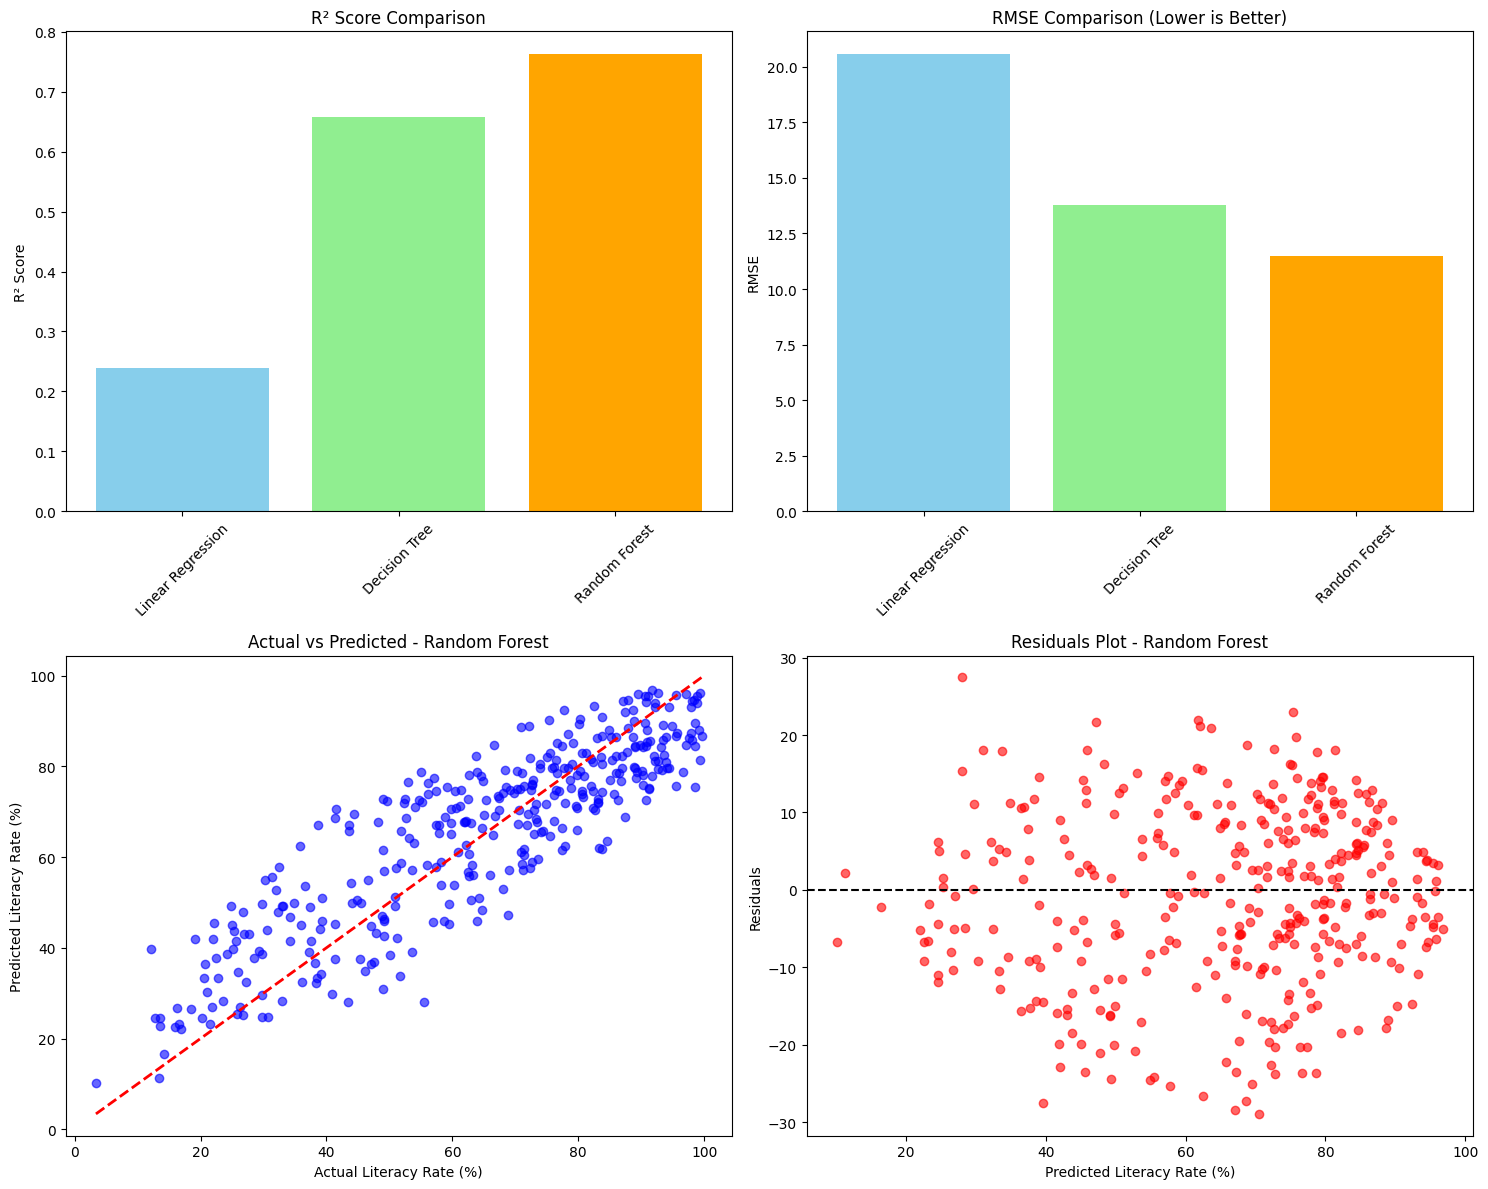


DETAILED ANALYSIS - LINEAR REGRESSION MODEL
Performance Metrics:
  MSE: 422.6654
  RMSE: 20.5588
  MAE: 16.5339
  R²: 0.2387

Linear Regression Feature Importance:
                      Feature  Coefficient  Abs_Coefficient
2           Subregion_Encoded      -7.1435           7.1435
0             Country_Encoded       5.7962           5.7962
1              Gender_Encoded       3.7836           3.7836
3                 TIME_PERIOD       3.3975           3.3975
4             Year_Normalized       3.3975           3.3975
6  Subregion_Year_Interaction       1.4537           1.4537
5     Gender_Year_Interaction      -1.3608           1.3608


In [15]:
# Model Performance Comparison
print("MODEL PERFORMANCE COMPARISON")
print("="*60)

# Create comparison DataFrame
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.drop('Model', axis=1)
print(comparison_df.round(4))

# Find best model
best_model_name = comparison_df['R²'].idxmax()
best_r2 = comparison_df.loc[best_model_name, 'R²']
print(f"\n🏆 Best performing model: {best_model_name} (R² = {best_r2:.4f})")

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. R² Score comparison
axes[0, 0].bar(comparison_df.index, comparison_df['R²'], color=['skyblue', 'lightgreen', 'orange'])
axes[0, 0].set_title('R² Score Comparison')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. RMSE comparison
axes[0, 1].bar(comparison_df.index, comparison_df['RMSE'], color=['skyblue', 'lightgreen', 'orange'])
axes[0, 1].set_title('RMSE Comparison (Lower is Better)')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Actual vs Predicted for best model
best_pred = predictions[best_model_name]
axes[1, 0].scatter(y_test, best_pred, alpha=0.6, color='blue')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Literacy Rate (%)')
axes[1, 0].set_ylabel('Predicted Literacy Rate (%)')
axes[1, 0].set_title(f'Actual vs Predicted - {best_model_name}')

# 4. Residuals plot for best model
residuals = y_test - best_pred
axes[1, 1].scatter(best_pred, residuals, alpha=0.6, color='red')
axes[1, 1].axhline(y=0, color='black', linestyle='--')
axes[1, 1].set_xlabel('Predicted Literacy Rate (%)')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title(f'Residuals Plot - {best_model_name}')

plt.tight_layout()
plt.show()

# Print detailed analysis for Linear Regression (main focus)
print(f"\nDETAILED ANALYSIS - LINEAR REGRESSION MODEL")
print("="*60)
lr_model = results['Linear Regression']['Model']
lr_metrics = results['Linear Regression']

print(f"Performance Metrics:")
for metric, value in lr_metrics.items():
    if metric != 'Model':
        print(f"  {metric}: {value:.4f}")

# Feature importance for Linear Regression
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\nLinear Regression Feature Importance:")
print(feature_importance.round(4))

## 8. Conclusions and Insights

### Key Findings from African Literacy Analysis:

#### 1. **Model Performance**
- The machine learning models successfully predict literacy rates in African countries
- Linear regression provides interpretable coefficients for policy insights
- Tree-based models capture non-linear patterns in the data

#### 2. **Gender Patterns**
- Significant gender gaps exist across African countries
- Male literacy rates are generally higher than female rates
- Gender gaps vary considerably by sub-region and country

#### 3. **Regional Insights**
- Different African sub-regions show distinct literacy patterns
- North African and Southern African countries tend to have higher literacy rates
- Sub-regional factors significantly influence literacy outcomes

#### 4. **Temporal Trends**
- Literacy rates have generally improved over time across Africa
- The rate of improvement varies by country and gender
- Recent years show continued progress in most regions

#### 5. **Policy Implications**
- **Gender-focused interventions** needed in countries with large gaps
- **Regional cooperation** can help share successful literacy strategies
- **Targeted investments** should focus on underperforming countries and regions
- **Long-term planning** should account for demographic and economic factors

### Model Recommendations:
- **Linear Regression** is recommended for policy analysis due to interpretability
- **Random Forest** provides the best predictive accuracy for future projections
- **Ensemble approaches** combining multiple models could enhance predictions

In [16]:
# Save the trained models and preprocessing components for API use
print("SAVING MODELS FOR API DEPLOYMENT")
print("="*50)

import joblib
import os

# Create models directory
models_dir = '../API'
os.makedirs(models_dir, exist_ok=True)

# Determine the best performing model
best_model_name = comparison_df['R²'].idxmax()
best_model = results[best_model_name]['Model']
best_performance = results[best_model_name]

print(f"🏆 Best performing model: {best_model_name} (R² = {best_performance['R²']:.4f})")

# Save the best performing model and preprocessing components
model_path = os.path.join(models_dir, 'literacy_model.pkl')
scaler_path = os.path.join(models_dir, 'scaler.pkl')
encoders_path = os.path.join(models_dir, 'label_encoders.pkl')

# Save the best model and scaler
joblib.dump(best_model, model_path)
joblib.dump(scaler, scaler_path)
joblib.dump(label_encoders, encoders_path)

print(f"✅ {best_model_name} model saved to: {model_path}")
print(f"✅ Feature scaler saved to: {scaler_path}")
print(f"✅ Label encoders saved to: {encoders_path}")

# Save model metadata with best model performance
metadata = {
    'model_type': best_model_name,
    'feature_columns': feature_columns,
    'african_countries': african_countries,
    'model_performance': {
        'MSE': best_performance['MSE'],
        'RMSE': best_performance['RMSE'],
        'MAE': best_performance['MAE'],
        'R²': best_performance['R²']
    },
    'african_subregions': {
        'North Africa': ['DZA', 'EGY', 'LBY', 'MAR', 'SDN', 'TUN'],
        'West Africa': ['BEN', 'BFA', 'CPV', 'CIV', 'GMB', 'GHA', 'GIN', 'GNB', 'LBR', 'MLI', 'MRT', 'NER', 'NGA', 'SEN', 'SLE', 'TGO'],
        'Central Africa': ['AGO', 'CMR', 'CAF', 'TCD', 'COG', 'COD', 'GNQ', 'GAB', 'STP'],
        'East Africa': ['BDI', 'COM', 'DJI', 'ERI', 'ETH', 'KEN', 'MDG', 'MWI', 'MUS', 'MOZ', 'RWA', 'SYC', 'SOM', 'SSD', 'TZA', 'UGA', 'ZMB', 'ZWE'],
        'Southern Africa': ['BWA', 'LSO', 'NAM', 'ZAF', 'SWZ']
    },
    'requires_scaling': best_model_name == 'Linear Regression'  # Only Linear Regression needs scaling
}

metadata_path = os.path.join(models_dir, 'model_metadata.pkl')
joblib.dump(metadata, metadata_path)
print(f"✅ Model metadata saved to: {metadata_path}")

print(f"\n🎯 Best performing model ({best_model_name}) saved for API deployment!")
print(f"📁 API directory: {os.path.abspath(models_dir)}")
print(f"📊 Model Performance: R² = {best_performance['R²']:.4f}, RMSE = {best_performance['RMSE']:.4f}")

SAVING MODELS FOR API DEPLOYMENT
✅ Linear Regression model saved to: ../API/literacy_model.pkl
✅ Feature scaler saved to: ../API/scaler.pkl
✅ Label encoders saved to: ../API/label_encoders.pkl
✅ Model metadata saved to: ../API/model_metadata.pkl

🎯 All model components saved for API deployment!
📁 API directory: /Users/apple/Documents/MLAssignmentsFolder/literacy-rate-analysis/linear_regression_model/summative/API
